# Final Project Coursera
In this project I want to explore Naples City (Italy) in order to show it is a good City for an investment in hotels and restaurant.
The mayor is trying to relaunch the city. He is in charge from **Vedere Anno**. We had several events as **Coppa Devis da Vedere** , **La coppa America** 

__Let's first of all try to import data for boroughs and neighborhoods__

In [2]:
from bs4 import BeautifulSoup
import requests # library to handle requests

import pandas as pd ### library for manipulating data as dataframe

import functools as ft ## function tools for reduce command

import numpy as np ## numpy array

import matplotlib ## library for plotting 
import matplotlib.pyplot as plt ## plots
%matplotlib inline

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library
import shapefile


# Import dataframe for boroughs and neighborhoods


In [3]:
#scrape site
res_all = requests.get("https://it.wikipedia.org/wiki/Municipalit%C3%A0_di_Napoli")
soup_all = BeautifulSoup(res_all.content, features='html')

# convert in dataframe
table = soup_all.find_all('table')[0] 
df = pd.read_html(str(table))[0]
df


,Distretto,Superficie,Popolazione,Densità,Presidente,Quartieri,Mappa
0,Municipalità I,"8,80 km²",82 673,"9.553,07 ab./km²",Francesco de Giovanni di Santa Severina (Forza...,"Chiaia, Posillipo, San Ferdinando",NaN
1,Municipalità II,"4,56 km²",91 536,"20.073,68 ab./km²",Francesco Chirico,"Avvocata, Montecalvario, Pendino, Porto, Merca...",NaN
2,Municipalità III,"9,51 km²",103 633,"10.897,27 ab./km²",Ivo Poggiani (Lista DemA),"Stella, San Carlo all'Arena",NaN
3,Municipalità IV,"9,27 km²",96 078,"10.364,4 ab./km²",Giampiero Perrella,"San Lorenzo, Vicaria, Poggioreale, Zona Indust...",NaN
4,Municipalità V,"7,42 km²",119 978,"16 169,54 ab./km²",Paolo De Luca,"Vomero, Arenella",NaN
5,Municipalità VI,"19,28 km²",138 641,"7 190,92 ab./km²",Salvatore Boggia,"Ponticelli, Barra, San Giovanni a Teduccio",NaN
6,Municipalità VII,"10,26 km²",91 460,"8 914,23 ab./km²",Maurizio Moschetti,"Miano, Secondigliano, San Pietro a Patierno",NaN
7,Municipalità VIII,"17,45 km²",92 616,"5 307,51 ab./km²",Paipais Apostolos,"Piscinola, Marianella, Scampia, Chiaiano",NaN
8,Municipalità IX,"16,56 km²",106 299,"6 419,02 ab./km²",Lorenzo Giannalavigna (PD),"Soccavo, Pianura",NaN
9,Municipalità X,"14,16 km²",101 192,"7 416,38 ab./km²",Diego Civitillo,"Bagnoli, Fuorigrotta",NaN


# Import geospatial data for every borough
In the website scraped are not present the coordinates for every borough but you can find in the site for the specific borough. The site are always of same form, changing just the number of borough. In every site the coordinates are in 'span class = "geo"'. 

__In order To build the data frame let's do the following steps:__

1. take the base site type: "https://it.wikipedia.org/wiki/Municipalit%C3%A0_" + number + "_di_Napoli":

In [4]:
firstPartOfSite = "https://it.wikipedia.org/wiki/Municipalit%C3%A0_"
thirdPartOfSite = "_di_Napoli"

2. take the number of boroughs:

In [5]:
numberBoroughs = len(df)

3. do for cycle for every borough building url and scraping site:

In [6]:
latitude = [];
longitude = [];
for number in range(1, numberBoroughs+1): ### the right extreme of range is not inclusive
    ## Define url
    url = firstPartOfSite + str(number) + thirdPartOfSite
    
    ## Scrape site
    res_borough = requests.get(url)
    soup_borough = BeautifulSoup(res_borough.content, features='html')
    
    ## Get Coordinates
    coordinates = soup_borough.find_all('span', attrs={"class":"geo"})[0].text
    latLong = [float(coord) for coord in (coordinates.split('; '))]
    latitude.append(latLong[0])
    longitude.append(latLong[1])

# Build DataFrame 

In [7]:
df.drop(columns=['Presidente', 'Mappa'], inplace=True)

In [8]:
## Rename
df.columns = ['Municipality', 'Surface_km2', 'Population', 'Density_per_km2', 'Neighborhood']

## Modify Municipality
df['Municipality'] = df['Municipality'].str.replace(" ", "_")

## Modify Surface
surface_numpy = df['Surface_km2'].to_numpy()
df['Surface_km2'] = [float(num.split()[0].replace(",",".")) for num in surface_numpy]

## Modify Population
population_numpy = df['Population'].to_numpy()
df['Population'] = [float(ft.reduce(lambda x, y: x + y, num.split())) for num in population_numpy]

## Modify Density
df['Density_per_km2'] = np.around(np.divide(df['Population'].to_numpy(), df['Surface_km2'].to_numpy()), decimals = 2)

## Add numbers of Neighborhoods for descritive analyses
neighborhood_numpy = df['Neighborhood'].to_numpy()
number_Neighborhoods = [neigh.split(',') for neigh in neighborhood_numpy]
number_Neighborhoods = [len(a) for a in number_Neighborhoods]
df['number_Neighborhoods'] = number_Neighborhoods
 
## Add Latitude and Longitude
df['Latitude'] = latitude
df['Longitude'] = longitude

In [9]:
df

,Municipality,Surface_km2,Population,Density_per_km2,Neighborhood,number_Neighborhoods,Latitude,Longitude
0,Municipalità_I,8.80,82673.0,9394.66,"Chiaia, Posillipo, San Ferdinando",3,40.805556,14.203333
1,Municipalità_II,4.56,91536.0,20073.68,"Avvocata, Montecalvario, Pendino, Porto, Merca...",6,40.847645,14.261577
2,Municipalità_III,9.51,103633.0,10897.27,"Stella, San Carlo all'Arena",2,40.863290,14.255261
3,Municipalità_IV,9.27,96078.0,10364.40,"San Lorenzo, Vicaria, Poggioreale, Zona Indust...",4,40.868743,14.301424
4,Municipalità_V,7.42,119978.0,16169.54,"Vomero, Arenella",2,40.865887,14.222102
5,Municipalità_VI,19.28,138641.0,7190.92,"Ponticelli, Barra, San Giovanni a Teduccio",3,40.853699,14.332309
6,Municipalità_VII,10.26,91460.0,8914.23,"Miano, Secondigliano, San Pietro a Patierno",3,40.890017,14.263705
7,Municipalità_VIII,17.45,92616.0,5307.51,"Piscinola, Marianella, Scampia, Chiaiano",4,40.892900,14.237700
8,Municipalità_IX,16.56,106299.0,6419.02,"Soccavo, Pianura",2,40.858422,14.170289
9,Municipalità_X,14.16,101192.0,7146.33,"Bagnoli, Fuorigrotta",2,40.818117,14.163919


# Plotting Boroughs on map

In [10]:
# Initialize a map
### Use geopy to extract a coordinate for Toronto address 
address = 'Napoli, Na'

geolocator = Nominatim(user_agent="my_explorer")

location = geolocator.geocode(address)
latAddress = location.latitude
longAddress = location.longitude

print('The geograpical coordinate of Naples are {}, {}.'.format(latAddress, longAddress))

The geograpical coordinate of Naples are 40.8359336, 14.2487826.


In [11]:
# create map of Naples using latitude and longitude values
map_naples = folium.Map(location=[latAddress, longAddress], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Municipality'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_naples)  
    
map_naples    

## Let's import shapefile

# Analisi descrittiva del dataframe

In [12]:
df.describe()

,Surface_km2,Population,Density_per_km2,number_Neighborhoods,Latitude,Longitude
count,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000
mean,11.727000,102410.60000,10187.756000,3.100000,40.856428,14.241162
std,4.838106,16340.59621,4625.415132,1.286684,0.027670,0.053602
min,4.560000,82673.00000,5307.510000,2.000000,40.805556,14.163919
25%,8.917500,91806.00000,7157.477500,2.000000,40.849159,14.208025
50%,9.885000,98635.00000,9154.445000,3.000000,40.860856,14.246481
75%,15.960000,105632.50000,10764.052500,3.750000,40.868029,14.263173
max,19.280000,138641.00000,20073.680000,6.000000,40.892900,14.332309


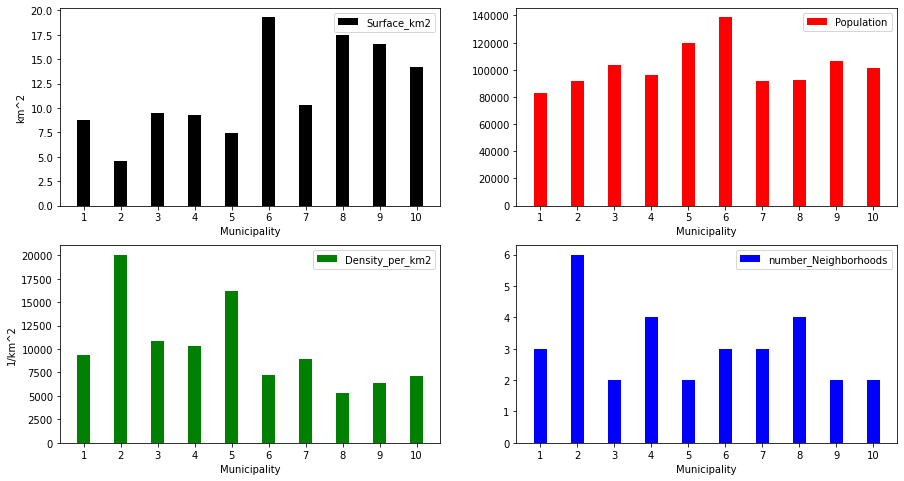

In [13]:
## Bar Plot
x = np.arange(1, len(df)+1)  # the label locations

width = 0.35  # the width of the bars

fig, axs = plt.subplots(2,2) ## Create a figure and a set of sublots
fig.set_size_inches(15, 8)
colors = ['black', 'red', 'green', 'blue']

# Plot Surface
axs[0,0].bar(x, df['Surface_km2'].to_numpy(), width, label='Surface_km2', color = colors[0])

axs[0,0].set_xlabel('Municipality')
axs[0,0].set_xticks(x)
axs[0,0].set_ylabel('km^2')
axs[0,0].legend()

# Plot Population
axs[0,1].bar(x, df['Population'].to_numpy(), width, label='Population', color = colors[1])

axs[0,1].set_xlabel('Municipality')
axs[0,1].set_xticks(x)
axs[0,1].legend()

# Plot Density
axs[1,0].bar(x, df['Density_per_km2'].to_numpy(), width, label='Density_per_km2', color = colors[2])

axs[1,0].set_xlabel('Municipality')
axs[1,0].set_xticks(x)
axs[1,0].set_ylabel('1/km^2')
axs[1,0].legend()

# Plot Number Neighborhood
axs[1,1].bar(x, df['number_Neighborhoods'].to_numpy(), width, label='number_Neighborhoods', color = colors[3])
axs[1,1].set_xlabel('Municipality')
axs[1,1].set_xticks(x)
axs[1,1].legend()


We can note that population is concentrated primarly in municipality with lower surface. So in this area there is a greater density of population and a greater number of neighborhoods (*second municipality shows 6 neighborhoods and ~20000 people per squared kilometer*)

_Let's see some scatter to better highlight these features_


Text(0, 0.5, 'Population')

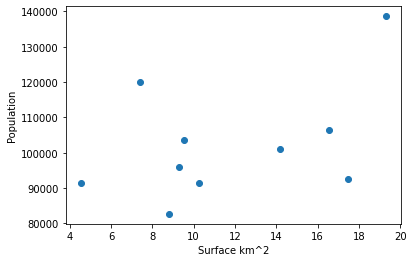

In [14]:
plt.scatter(df['Surface_km2'], df['Population'])
plt.xlabel('Surface km^2')
plt.ylabel('Population')

There is a net separation at 12 squared kilometers. Let's count the overall population at this cut value

In [15]:
dfLower = df[df['Surface_km2']<12]
populationLower = dfLower['Population'].sum()

dfUpper = df[df['Surface_km2']>12]
populationUpper = dfUpper['Population'].sum()

print("Population with in municipality with Surface lower than 12 squared kilometers: %d" % populationLower)
print("Population with in municipality with Surface greater than 12 squared kilometers: %d" % populationUpper)


Population with in municipality with Surface lower than 12 squared kilometers: 585358
Population with in municipality with Surface greater than 12 squared kilometers: 438748


Text(0, 0.5, 'Population')

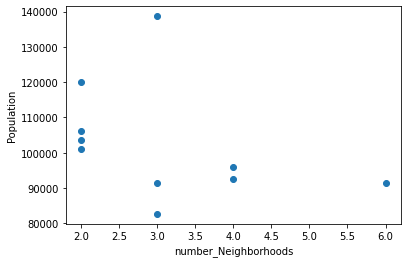

In [16]:
plt.scatter(df['number_Neighborhoods'], df['Population'])
plt.xlabel('number_Neighborhoods')
plt.ylabel('Population')

The population is primarly concentrated in municipality with low number of Neighborhoods

Text(0, 0.5, 'Surface_km2')

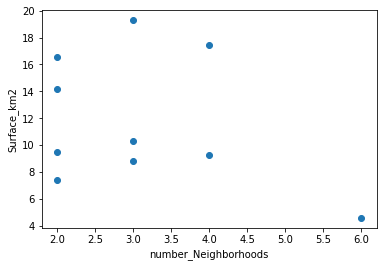

In [17]:
plt.scatter(df['number_Neighborhoods'], df['Surface_km2'])
plt.xlabel('number_Neighborhoods')
plt.ylabel('Surface_km2')

# Si prova ad estrarre i dati relativi alla temperatura

In [18]:
## Per Prima cosa devo riuscire a estrarre la wikitable ---> 
## Poi devo entrare nel body della table ---> 
## Poi devo estrarre le tr ----> 
## nelle tr estrarre le td

## Si può creare un data frame con le colonne che estraggo, inidiczzarlo per i mesi e poi fare la trasposta

## Plottare l'andamento della temperatura con i mesi insieme alla deviazione standard come limiti di confidenza 
## Si può fare anche un barplot della rain sovrapposto a quello della temperatura
## E poi si può aggiungere il valore medio dell'umidità

In [20]:
## Define url
url = "https://en.climate-data.org/europe/italy/campania/naples-4561/"
    
## Scrape site
res_temperature = requests.get(url)
soup_temperature = BeautifulSoup(res_temperature.content, features='html')

## extract wiki table
table_temp = soup_temperature.find_all('table', attrs={"id":"weather_table"}) ## la table è unica

df_temp = pd.read_html(str(table_temp))[0]
df_temp

,Unnamed: 0,January,February,March,April,May,June,July,August,September,October,November,December
0,Avg. Temperature (°C),8.6,9.2,10.9,13.3,17.2,21.0,23.3,23.6,21.0,17.0,13.0,9.9
1,Min. Temperature (°C),4.9,5.2,6.7,8.9,12.5,16.0,18.1,18.3,16.2,12.6,9.1,6.3
2,Max. Temperature (°C),12.4,13.2,15.1,17.8,22.0,26.0,28.6,29.0,25.9,21.5,17.0,13.5
3,Avg. Temperature (°F),47.5,48.6,51.6,55.9,63.0,69.8,73.9,74.5,69.8,62.6,55.4,49.8
4,Min. Temperature (°F),40.8,41.4,44.1,48.0,54.5,60.8,64.6,64.9,61.2,54.7,48.4,43.3
5,Max. Temperature (°F),54.3,55.8,59.2,64.0,71.6,78.8,83.5,84.2,78.6,70.7,62.6,56.3
6,Precipitation / Rainfall (mm),100.0,84.0,76.0,68.0,44.0,29.0,21.0,37.0,71.0,112.0,141.0,111.0


In [ ]:
Usare seaborn per plottare i livelli di confidenza. Fare Barplot piovosità

# Giusto per fare anche un confronto con New York per avere una idea

## Nella prossima sezione si vedrà l'applicazione di Foursquare API per estrarre i locali presenti in ogni sezione 